In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')


In [3]:
df.head()

,Unnamed: 0,Description,Mental_State
0,0,I'm sorry about this post. It's gonna be a who...,Addiction
1,1,Been getting super high off high amounts of th...,Addiction
2,2,My brothers been shooting heroin/meth for the ...,Addiction
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction


In [4]:
df.tail()

,Unnamed: 0,Description,Mental_State
11736,11736,possible have satpathy ask question the questi...,neutral
11737,11737,god that was thorough,neutral
11738,11738,thread and meat kaun jat bhai,neutral
11739,11739,not touch food with your left hand left handed,neutral
11740,11740,they say because they care for,neutral


In [5]:
df.drop(labels='Unnamed: 0', axis=1)

,Description,Mental_State
0,I'm sorry about this post. It's gonna be a who...,Addiction
1,Been getting super high off high amounts of th...,Addiction
2,My brothers been shooting heroin/meth for the ...,Addiction
3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,Ive smoked weed since 8th grade in middle scho...,Addiction
...,...,...
11736,possible have satpathy ask question the questi...,neutral
11737,god that was thorough,neutral
11738,thread and meat kaun jat bhai,neutral
11739,not touch food with your left hand left handed,neutral


In [6]:
df.dropna(inplace=True)

In [7]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

In [8]:
text = df['Description'].values.tolist()
label = df['Mental_State'].tolist()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [10]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)
 
    

In [11]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 144
	95percentile : 432
	99percentile : 743


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 151
	95percentile : 460
	99percentile : 846


In [12]:
model = t.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [14]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
1428/1428 [==============================] - 15679s 11s/step - loss: 1.7345 - accuracy: 0.4351 - val_loss: 0.9007 - val_accuracy: 0.7320
Epoch 2/5
1428/1428 [==============================] - 15682s 11s/step - loss: 0.7539 - accuracy: 0.7703 - val_loss: 0.7228 - val_accuracy: 0.7787
Epoch 3/5
1428/1428 [==============================] - 15677s 11s/step - loss: 0.5097 - accuracy: 0.8405 - val_loss: 0.6547 - val_accuracy: 0.8039
Epoch 4/5
1428/1428 [==============================] - 15770s 11s/step - loss: 0.2740 - accuracy: 0.9176 - val_loss: 0.6809 - val_accuracy: 0.8044
Epoch 5/5
1428/1428 [==============================] - 15789s 11s/step - loss: 0.1161 - accuracy: 0.9714 - val_loss: 0.7135 - val_accuracy: 0.8053


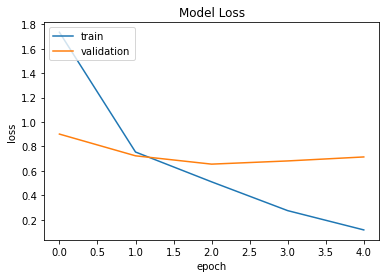

In [16]:
learner.plot('loss')

In [17]:
learner.evaluate()


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       205
           1       0.88      0.90      0.89       196
           2       0.78      0.77      0.78       189
           3       0.82      0.80      0.81       153
           4       0.78      0.79      0.79       220
           5       0.76      0.78      0.77       215
           6       0.59      0.64      0.62       206
           7       0.85      0.86      0.85       197
           8       0.90      0.84      0.87       159
           9       0.69      0.62      0.65       197
          10       0.96      1.00      0.98       205

    accuracy                           0.81      2142
   macro avg       0.81      0.81      0.81      2142
weighted avg       0.81      0.81      0.81      2142



array([[178,  16,   2,   3,   1,   2,   1,   1,   1,   0,   0],
       [ 13, 177,   3,   1,   1,   0,   0,   0,   1,   0,   0],
       [  1,   0, 146,   3,  11,   8,  13,   2,   0,   4,   1],
       [  1,   4,   6, 122,   2,   8,   2,   5,   2,   1,   0],
       [  0,   0,   7,   1, 174,  11,  10,  12,   0,   5,   0],
       [  2,   2,   3,   7,  12, 167,  11,   2,   2,   7,   0],
       [  1,   1,  11,   5,   8,  10, 132,   4,   0,  33,   1],
       [  0,   0,   3,   4,   8,   3,   5, 169,   1,   3,   1],
       [  4,   2,   4,   2,   0,   5,   2,   0, 134,   2,   4],
       [  2,   0,   2,   0,   6,   6,  47,   4,   7, 122,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 204]],
      dtype=int64)

In [18]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()                                          

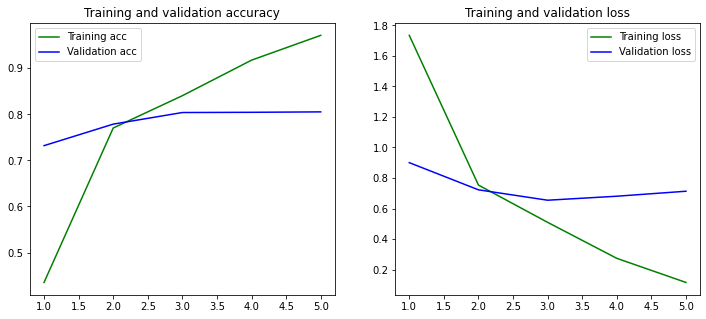

In [21]:
PlotGraph(history)

In [22]:
learner.validate(class_names=t.get_classes()) 

                        precision    recall  f1-score   support

             Addiction       0.88      0.87      0.87       205
            Alcoholism       0.88      0.90      0.89       196
               Anxiety       0.78      0.77      0.78       189
             Aspergers       0.82      0.80      0.81       153
               Bipolar       0.78      0.79      0.79       220
Borderline Personality       0.76      0.78      0.77       215
            Depression       0.59      0.64      0.62       206
         Schizophernia       0.85      0.86      0.85       197
              SelfHarm       0.90      0.84      0.87       159
        Suidal Thought       0.69      0.62      0.65       197
               neutral       0.96      1.00      0.98       205

              accuracy                           0.81      2142
             macro avg       0.81      0.81      0.81      2142
          weighted avg       0.81      0.81      0.81      2142



array([[178,  16,   2,   3,   1,   2,   1,   1,   1,   0,   0],
       [ 13, 177,   3,   1,   1,   0,   0,   0,   1,   0,   0],
       [  1,   0, 146,   3,  11,   8,  13,   2,   0,   4,   1],
       [  1,   4,   6, 122,   2,   8,   2,   5,   2,   1,   0],
       [  0,   0,   7,   1, 174,  11,  10,  12,   0,   5,   0],
       [  2,   2,   3,   7,  12, 167,  11,   2,   2,   7,   0],
       [  1,   1,  11,   5,   8,  10, 132,   4,   0,  33,   1],
       [  0,   0,   3,   4,   8,   3,   5, 169,   1,   3,   1],
       [  4,   2,   4,   2,   0,   5,   2,   0, 134,   2,   4],
       [  2,   0,   2,   0,   6,   6,  47,   4,   7, 122,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 204]],
      dtype=int64)